In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
trash_df = pd.read_csv("data/생활폐기물_변화량.csv")
trash_df.tail()

,시점,매립,소각,재활용
18,2014,6271.7,11530.6,24552.9
19,2015,5953.2,12074.9,25383.1
20,2016,6465.5,12389.0,26605.8
21,2017,6229.1,12016.7,26763.1
22,2018,6545.2,12429.3,27774.8


In [3]:
trash_df['총배출량'] = trash_df['매립'] + trash_df['소각'] + trash_df['재활용']
trash_df.columns = ['year','landfill','incineration', 'recycling', 'all_trash']
display(trash_df)

,year,landfill,incineration,recycling,all_trash
0,1996,29066.0,2148.9,11008.2,42223.1
1,1997,25986.4,2684.2,11659.8,40330.4
2,1998,21825.6,3310.9,13028.7,38165.2
3,1999,20402.4,3936.5,14330.1,38669.0
4,2000,18956.3,4730.7,15697.2,39384.2
5,2001,17557.5,5908.5,17302.2,40768.2
6,2002,17508.0,6619.1,18655.8,42782.9
7,2003,17205.8,6761.6,18950.7,42918.1
8,2004,14954.6,6524.4,20099.0,41578.0
9,2005,11139.4,6933.7,22493.4,40566.5


In [15]:
all_trash_df = trash_df.iloc[:,[0,4]]
all_trash_df.set_index('year', inplace=True)
train_df = all_trash_df.iloc[0:21]
test_df = all_trash_df.iloc[21:23]
display(train_df)
display(test_df)

,all_trash
year,
1996,42223.1
1997,40330.4
1998,38165.2
1999,38669.0
2000,39384.2
2001,40768.2
2002,42782.9
2003,42918.1
2004,41578.0


,all_trash
year,
2017,45008.9
2018,46749.3


In [16]:
train_df.describe()

,all_trash
count,21.000000
mean,41439.452381
std,1657.001645
min,38165.200000
25%,40566.500000
50%,41578.000000
75%,42355.200000
max,45460.300000


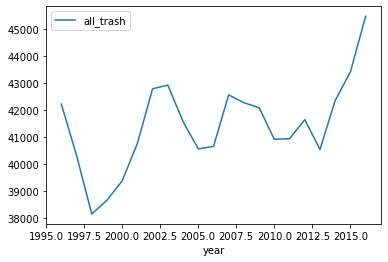

In [17]:
train_df.plot()
plt.show()

In [64]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(train_df.all_trash.values, order=(1,1,1))
model_fit = model.fit(trend='nc', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   20
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -170.457
Method:                       css-mle   S.D. of innovations           1212.459
Date:                Mon, 21 Dec 2020   AIC                            346.913
Time:                        22:18:19   BIC                            349.900
Sample:                             1   HQIC                           347.496
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.2326      0.467      0.498      0.618      -0.682       1.148
ma.L1.D.y      0.1399      0.417      0.335      0.737      -0.678       0.958
                                    Roots           

<AxesSubplot:>

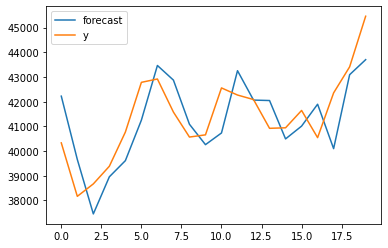

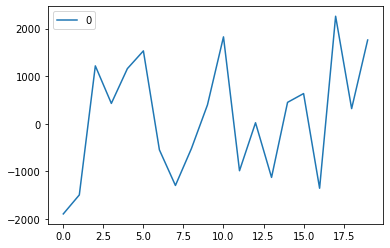

In [65]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과입니다. (첫번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화합니다. (두번째 그래프)
residuals.plot()

In [66]:
forecast_data = model_fit.forecast(steps=2) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.
pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = test_df.all_trash.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

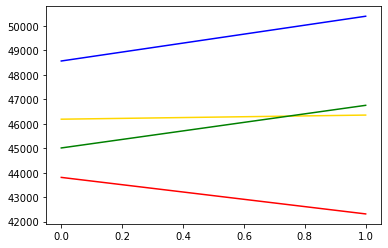

In [67]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

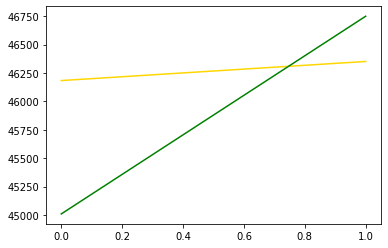

In [68]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [69]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

876.6739426898152


In [70]:
display(forecast_data[0])

array([46183.02249218, 46351.11564954])

In [71]:
display(test_df)

,all_trash
year,
2017,45008.9
2018,46749.3


In [72]:
landfill_predict_data = model_fit.forecast(steps=20) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

In [73]:
display(landfill_predict_data[0])

array([46183.02249218, 46351.11564954, 46390.21130501, 46399.30430023,
       46401.41917876, 46401.91106411, 46402.02546841, 46402.05207694,
       46402.05826563, 46402.05970502, 46402.0600398 , 46402.06011766,
       46402.06013577, 46402.06013998, 46402.06014096, 46402.06014119,
       46402.06014125, 46402.06014126, 46402.06014126, 46402.06014126])

In [23]:
display(landfill_predict_data[0][2:21])

array([6601.3414554 , 6555.76635624, 6511.9950118 , 6469.81562108,
       6429.18090965, 6390.03350755, 6352.3190368 , 6315.98504257,
       6280.98099512, 6247.25821388, 6214.76980019, 6183.47057202,
       6153.31700119, 6124.26715276, 6096.28062678, 6069.31850205,
       6043.34328203, 6018.31884269])

In [29]:
a = []
for i in range(2019, 2037):
    a.append(i)
    
add_df = pd.DataFrame(data={'year':a, 'landfill':landfill_predict_data[0][2:21]})
add_df.set_index('year', inplace=True) 
display(add_df)

,landfill
year,
2019,6601.341455
2020,6555.766356
2021,6511.995012
2022,6469.815621
2023,6429.180910
2024,6390.033508
2025,6352.319037
2026,6315.985043
2027,6280.980995


In [31]:
landfill_pred_df = pd.concat([all_trash_df,add_df])
display(landfill_pred_df)

,landfill
year,
1996,29066.000000
1997,25986.400000
1998,21825.600000
1999,20402.400000
2000,18956.300000
2001,17557.500000
2002,17508.000000
2003,17205.800000
2004,14954.600000


## 매립량 시계열 분석

In [129]:
all_trash_df = trash_df.iloc[:,[0,1]]
all_trash_df.set_index('year', inplace=True)
train_df = all_trash_df.iloc[0:21]
test_df = all_trash_df.iloc[21:23]
display(train_df)
display(test_df)

,landfill
year,
1996,29066.0
1997,25986.4
1998,21825.6
1999,20402.4
2000,18956.3
2001,17557.5
2002,17508.0
2003,17205.8
2004,14954.6


,landfill
year,
2017,6229.1
2018,6545.2


In [130]:
train_df.describe()

,landfill
count,21.000000
mean,13125.647619
std,7176.363156
min,5953.200000
25%,6684.300000
50%,10334.000000
75%,17557.500000
max,29066.000000


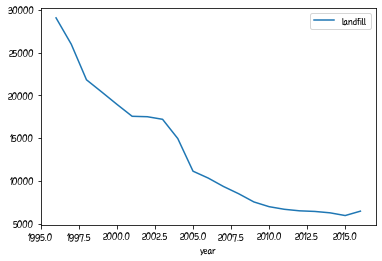

In [131]:
train_df.plot()
plt.show()

In [150]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(train_df.landfill.values, order=(2,1,2))
model_fit = model.fit(trend='nc', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   20
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -168.378
Method:                       css-mle   S.D. of innovations           1060.890
Date:                Mon, 21 Dec 2020   AIC                            346.756
Time:                        22:29:42   BIC                            351.735
Sample:                             1   HQIC                           347.728
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.8880      0.594      1.494      0.135      -0.277       2.053
ar.L2.D.y      0.0727      0.567      0.128      0.898      -1.039       1.184
ma.L1.D.y     -0.2111      0.552     -0.383      0.7

<AxesSubplot:>

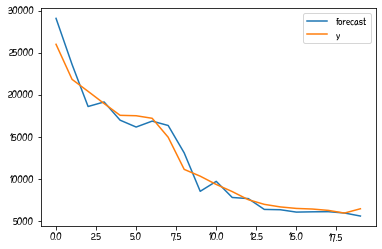

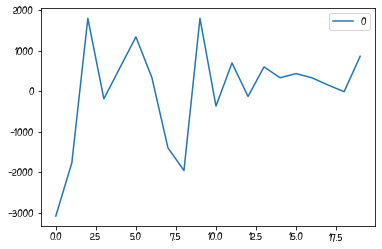

In [151]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과입니다. (첫번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화합니다. (두번째 그래프)
residuals.plot()

In [152]:
forecast_data = model_fit.forecast(steps=2) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.
pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = test_df.landfill.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

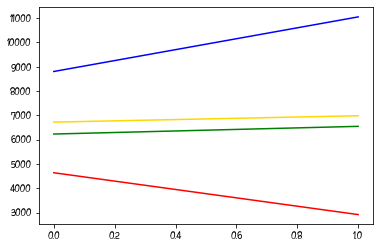

In [153]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

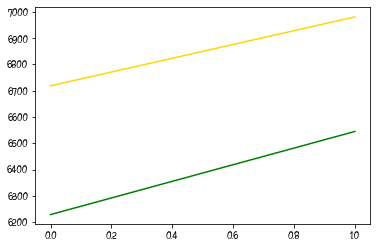

In [154]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [155]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

463.33860452190146


In [156]:
display(forecast_data[0])

array([6718.67816295, 6980.72100666])

In [157]:
display(test_df)

,landfill
year,
2017,6229.1
2018,6545.2


In [158]:
landfill_predict_data = model_fit.forecast(steps=20) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

In [159]:
display(landfill_predict_data[0])

array([6718.67816295, 6646.78287667, 6601.3414554 , 6555.76635624,
       6511.9950118 , 6469.81562108, 6429.18090965, 6390.03350755,
       6352.3190368 , 6315.98504257, 6280.98099512, 6247.25821388,
       6214.76980019, 6183.47057202, 6153.31700119, 6124.26715276,
       6096.28062678, 6069.31850205, 6043.34328203, 6018.31884269])

In [160]:
display(landfill_predict_data[0][2:21])

array([6601.3414554 , 6555.76635624, 6511.9950118 , 6469.81562108,
       6429.18090965, 6390.03350755, 6352.3190368 , 6315.98504257,
       6280.98099512, 6247.25821388, 6214.76980019, 6183.47057202,
       6153.31700119, 6124.26715276, 6096.28062678, 6069.31850205,
       6043.34328203, 6018.31884269])

In [161]:
a = []
for i in range(2019, 2037):
    a.append(i)
    
add_df = pd.DataFrame(data={'year':a, 'landfill':landfill_predict_data[0][2:21]})
add_df.set_index('year', inplace=True) 
display(add_df)

,landfill
year,
2019,6601.341455
2020,6555.766356
2021,6511.995012
2022,6469.815621
2023,6429.180910
2024,6390.033508
2025,6352.319037
2026,6315.985043
2027,6280.980995


In [162]:
landfill_pred_df = pd.concat([all_trash_df,add_df])
display(landfill_pred_df)

,landfill
year,
1996,29066.000000
1997,25986.400000
1998,21825.600000
1999,20402.400000
2000,18956.300000
2001,17557.500000
2002,17508.000000
2003,17205.800000
2004,14954.600000


## 소각량 시계열 분석

In [163]:
all_trash_df = trash_df.iloc[:,[0,2]]
all_trash_df.set_index('year', inplace=True)
train_df = all_trash_df.iloc[0:21]
test_df = all_trash_df.iloc[21:23]
display(train_df)
display(test_df)

,incineration
year,
1996,2148.9
1997,2684.2
1998,3310.9
1999,3936.5
2000,4730.7
2001,5908.5
2002,6619.1
2003,6761.6
2004,6524.4


,incineration
year,
2017,12016.7
2018,12429.3


In [164]:
train_df.describe()

,incineration
count,21.00000
mean,7708.40000
std,3165.07037
min,2148.90000
25%,5908.50000
50%,7500.70000
75%,10671.50000
max,12389.00000


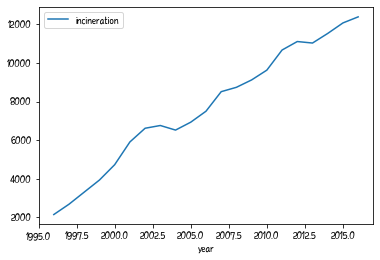

In [165]:
train_df.plot()
plt.show()

In [167]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(train_df.incineration.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   20
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -141.530
Method:                       css-mle   S.D. of innovations            267.242
Date:                Mon, 21 Dec 2020   AIC                            295.060
Time:                        22:30:17   BIC                            301.034
Sample:                             1   HQIC                           296.226
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        503.8226     19.198     26.243      0.000     466.194     541.451
ar.L1.D.y      0.8815      0.330      2.668      0.008       0.234       1.529
ar.L2.D.y     -0.4369      0.295     -1.480      0.1

<AxesSubplot:>

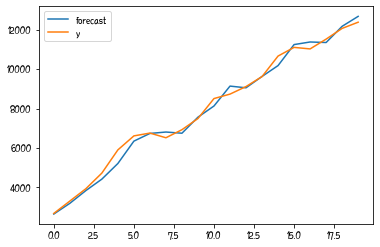

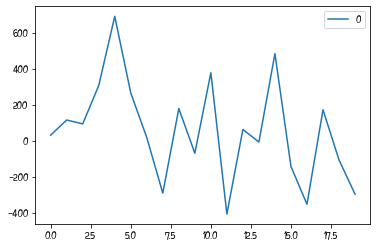

In [168]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과입니다. (첫번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화합니다. (두번째 그래프)
residuals.plot()

In [169]:
forecast_data = model_fit.forecast(steps=2) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.
pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = test_df.incineration.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

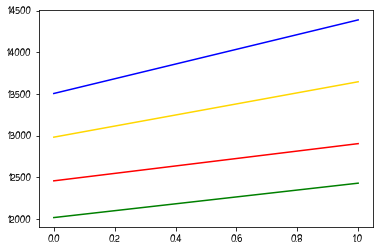

In [170]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

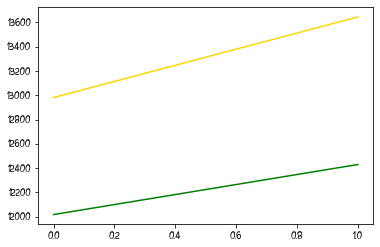

In [171]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [172]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

1097.4478730288813


In [173]:
display(forecast_data[0])

array([12980.98805287, 13645.41357164])

In [174]:
display(test_df)

,incineration
year,
2017,12016.7
2018,12429.3


In [175]:
inc_predict_data = model_fit.forecast(steps=20) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

In [176]:
display(inc_predict_data[0])

array([12980.98805287, 13681.46593859, 14320.1294235 , 14856.90670081,
       15330.87286438, 15793.97954383, 16274.95309486, 16776.42088315,
       17288.14954303, 17799.97028436, 18307.38961046, 18810.88874111,
       19312.85492393, 19815.18235657, 20318.49792789, 20822.52675424,
       21326.75265397, 21830.84068513, 22334.7210874 , 22838.4786887 ])

In [177]:
a = []
for i in range(2019, 2037):
    a.append(i-1000)
    
add_df = pd.DataFrame(data={'year':a, 'incineration':inc_predict_data[0][2:21]})
add_df.set_index('year', inplace=True) 
display(add_df)

,incineration
year,
2019,14320.129423
2020,14856.906701
2021,15330.872864
2022,15793.979544
2023,16274.953095
2024,16776.420883
2025,17288.149543
2026,17799.970284
2027,18307.389610


In [179]:
inc_pred_df = pd.concat([all_trash_df,add_df])
display(inc_pred_df)

,incineration
year,
1996,2148.900000
1997,2684.200000
1998,3310.900000
1999,3936.500000
2000,4730.700000
2001,5908.500000
2002,6619.100000
2003,6761.600000
2004,6524.400000


# 재활용량 시계열 분석

In [180]:
all_trash_df = trash_df.iloc[:,[0,3]]
all_trash_df.set_index('year', inplace=True)
train_df = all_trash_df.iloc[0:21]
test_df = all_trash_df.iloc[21:23]
display(train_df)
display(test_df)

,recycling
year,
1996,11008.2
1997,11659.8
1998,13028.7
1999,14330.1
2000,15697.2
2001,17302.2
2002,18655.8
2003,18950.7
2004,20099.0


,recycling
year,
2017,26763.1
2018,27774.8


In [181]:
train_df.describe()

,recycling
count,21.000000
mean,20605.404762
std,4966.648446
min,11008.200000
25%,17302.200000
50%,22820.900000
75%,24552.900000
max,26605.800000


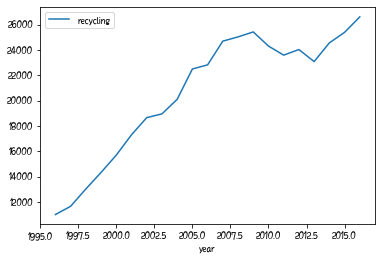

In [182]:
train_df.plot()
plt.show()

In [199]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(train_df.recycling.values, order=(1,1,1))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   20
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -163.591
Method:                       css-mle   S.D. of innovations            860.964
Date:                Mon, 21 Dec 2020   AIC                            335.181
Time:                        22:32:06   BIC                            339.164
Sample:                             1   HQIC                           335.959
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        799.9323    300.492      2.662      0.008     210.979    1388.886
ar.L1.D.y      0.6405      0.314      2.037      0.042       0.024       1.257
ma.L1.D.y     -0.4115      0.344     -1.198      0.2

<AxesSubplot:>

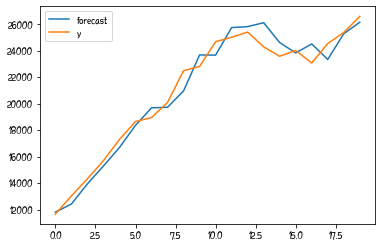

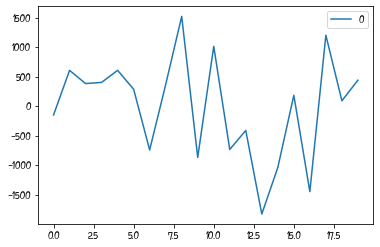

In [200]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과입니다. (첫번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화합니다. (두번째 그래프)
residuals.plot()

In [201]:
forecast_data = model_fit.forecast(steps=2) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.
pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
test_y = test_df.recycling.values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

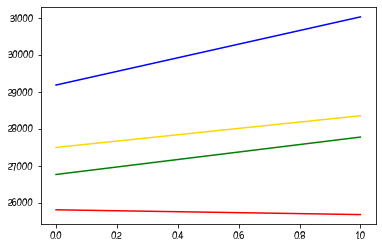

In [202]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소가격 그래프입니다.
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

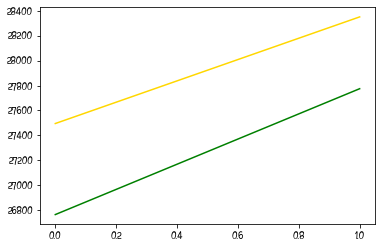

In [203]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프입니다.
plt.plot(test_y, color="green") # 실제 가격 그래프입니다.

In [204]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

659.0333256730488


In [205]:
display(forecast_data[0])

array([27494.90645643, 28351.95609589])

In [206]:
display(test_df)

,recycling
year,
2017,26763.1
2018,27774.8


In [207]:
recycle_predict_data = model_fit.forecast(steps=20) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

In [208]:
display(recycle_predict_data[0])

array([27494.90645643, 28351.95609589, 29188.47288493, 30011.83808916,
       30826.77951495, 31636.32538997, 32442.41533746, 33246.29171386,
       34048.75026626, 34850.30068209, 35651.26942344, 36451.86559394,
       37252.22312749, 38052.42781065, 38852.53459094, 39652.57866305,
       40452.58256967, 41252.56074971, 42052.52245151, 42852.47359877])

In [209]:
a = []
for i in range(2019, 2037):
    a.append(i)
    
add_df = pd.DataFrame(data={'year':a, 'recycling':recycle_predict_data[0][2:21]})
add_df.set_index('year', inplace=True) 
display(add_df)

,recycling
year,
2019,29188.472885
2020,30011.838089
2021,30826.779515
2022,31636.325390
2023,32442.415337
2024,33246.291714
2025,34048.750266
2026,34850.300682
2027,35651.269423


In [210]:
recycle_pred_df = pd.concat([all_trash_df,add_df])
display(recycle_pred_df)

,recycling
year,
1996,11008.200000
1997,11659.800000
1998,13028.700000
1999,14330.100000
2000,15697.200000
2001,17302.200000
2002,18655.800000
2003,18950.700000
2004,20099.000000


In [211]:
t = landfill_pred_df.join(inc_pred_df)
result = t.join(recycle_pred_df)
result['total'] = result['landfill'] + result['incineration'] + result['recycling']
display(result)
result.to_csv("예측.csv")

,landfill,incineration,recycling,total
year,,,,
1996,29066.000000,2148.900000,11008.200000,42223.100000
1997,25986.400000,2684.200000,11659.800000,40330.400000
1998,21825.600000,3310.900000,13028.700000,38165.200000
1999,20402.400000,3936.500000,14330.100000,38669.000000
2000,18956.300000,4730.700000,15697.200000,39384.200000
2001,17557.500000,5908.500000,17302.200000,40768.200000
2002,17508.000000,6619.100000,18655.800000,42782.900000
2003,17205.800000,6761.600000,18950.700000,42918.100000
2004,14954.600000,6524.400000,20099.000000,41578.000000


In [212]:
result_total_df = result.loc[:,['total']]

In [213]:
display(result_total_df)

,total
year,
1996,42223.100000
1997,40330.400000
1998,38165.200000
1999,38669.000000
2000,39384.200000
2001,40768.200000
2002,42782.900000
2003,42918.100000
2004,41578.000000


In [221]:
a = result_total_df.loc[[2010, 2015, 2020, 2025, 2030, 2035],:]
display(a)

,total
year,
2010,40920.400000
2015,43411.200000
2020,51424.511146
2025,57689.218846
2030,64051.080739
2035,70430.586821


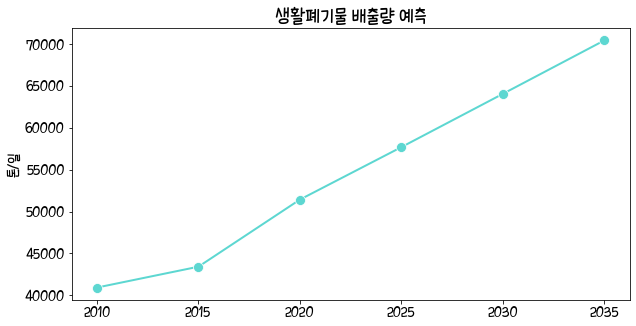

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)

# 그래프 그리기
sns.lineplot(x=a.index , y="total",data=a,ax=ax1, color='#5DD7D1', marker='o', markersize=10, linewidth=2)
plt.title('생활폐기물 배출량 예측', fontsize=20)
plt.ylabel('톤/일',fontsize=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("")

plt.show()

In [121]:
from matplotlib import font_manager, rc
font_path = "../data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

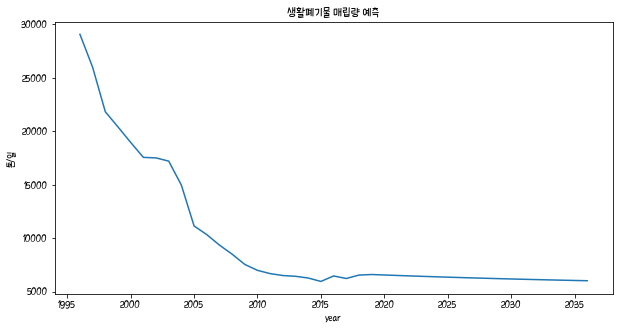

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)

# 그래프 그리기
sns.lineplot(x=result.index , y="landfill",data=result,ax=ax1)
plt.title('생활폐기물 매립량 예측')
plt.ylabel('톤/일')
# 출력 
plt.savefig('생활폐기물 매립량 예측.png')
plt.show()

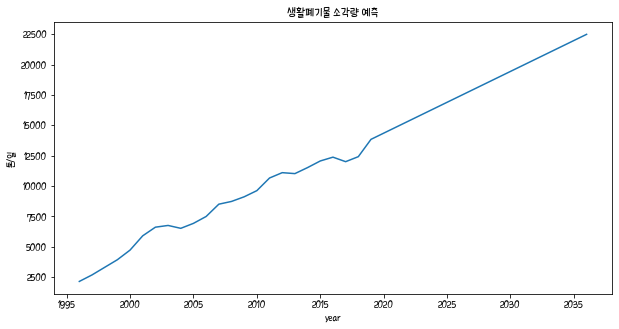

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)

# 그래프 그리기
sns.lineplot(x=result.index , y="incineration",data=result,ax=ax1)
plt.title('생활폐기물 소각량 예측')
plt.ylabel('톤/일')
# 출력 
plt.savefig('생활폐기물 소각량 예측.png')
plt.show()

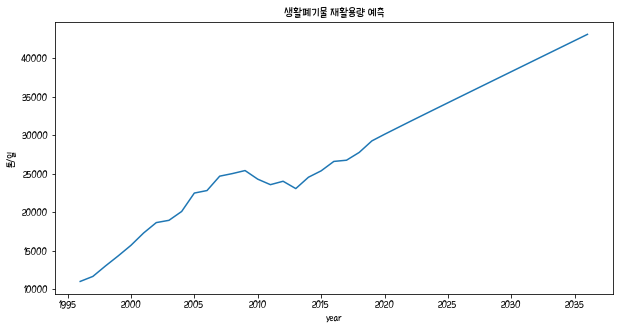

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)

# 그래프 그리기
sns.lineplot(x=result.index , y="recycling",data=result,ax=ax1)
plt.title('생활폐기물 재활용량 예측')
plt.ylabel('톤/일')
plt.savefig('생활폐기물 재활용량 예측.png')
# 출력 
plt.show()

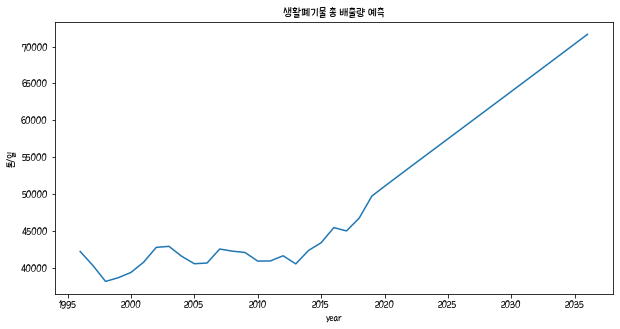

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)

# 그래프 그리기
sns.lineplot(x=result.index , y="total",data=result,ax=ax1)
plt.title('생활폐기물 총 배출량 예측')
plt.ylabel('톤/일')
# 출력 
plt.savefig('생활폐기물 총 배출량 예측.png')
plt.show()